there are 4699 lines in the file
measurement in array -0.35
X_train prepared AUGMENTED
y_train AUGMENTED


Using TensorFlow backend.


Sequential
Lambda applied
Cropping applied


C:\Users\sebastien\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:73: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
C:\Users\sebastien\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:74: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
C:\Users\sebastien\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:75: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
C:\Users\sebastien\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:76: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\sebastien\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:77: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 

Train on 11275 samples, validate on 2819 samples
Epoch 1/10
11275/11275 [==============================] - 122s 11ms/step - loss: 0.0512 - val_loss: 0.0607

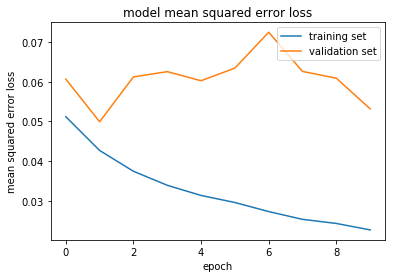

In [1]:
import csv
import cv2
import numpy as np # numpy array is the format required by Keras

lines = []

with open('data/driving_log.csv') as csvDataFile:
    csvReader =csv.reader(csvDataFile)
    for line in csvReader:
        #print ("lines:", line)
        lines.append(line)
        
images = [] # this represents the features
measurements = [] # this represents the labels to predict

print ("there are %d lines in the file"%(len(lines)))

for line in lines[1:]: #skipping the headers
    
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path =filename # 'data/IMG/'+ filename
    #print("current path", current_path)
    image = cv2.imread(current_path)
    images.append(image)
    images.append(cv2.imread(line[1]))
    images.append(cv2.imread(line[2]))

  
    # extracting the steering wheel as labels
    #print ("steering angle", line[3])
    measurement = float(line[3])
    
    #print ("measurement", measurement)
    measurements.append(measurement)
    measurements.append(measurement+0.25)
    measurements.append(measurement-0.25)

# checking array validity
print ("measurement in array", measurements[66])
"""
#Augment the number of images by getting a flip of each image
augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(-1*measurement)
"""
X_train = np.array(images)#augmented_images)
print("X_train prepared AUGMENTED")
y_train = np.array(measurements)#augmented_measurements)
print("y_train AUGMENTED")


from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D


#Testing the data on a simplistic neural network
model = Sequential()
print("Sequential")
      
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape = (160, 320, 3)))
print("Lambda applied")

model.add(Cropping2D(cropping=((70,25),(0,0))))
print("Cropping applied")

#Nvidia network architecture, gives beter results than LeNet on this case
model.add(Convolution2D(24,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(36,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(48,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
#Using Dropout to avoid overfitting
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100))
#Using Dropout to avoid overfitting
model.add(Dropout(0.5))
model.add(Dense(50))
#Using Dropout to avoid overfitting
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dense(1))

from keras.models import Model
import matplotlib.pyplot as plt

# it is a regression network not a classification network, 'measn square errors' is used
model.compile(loss='mse', optimizer='adam')
# epoch is set to 7 because after this number the prediction accuracy decreases
history_object=model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=10)

model.save('model.h5')

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.savefig('error_loss_behavior_cloning_3drouputlayers50pct_angle025-10epochs')
plt.show()

In [ ]:
import imageio
imageio.plugins.ffmpeg.download()